# Data Description

#### Bike Sharing Dataset Description
datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather
  1: Clear, Few clouds, Partly cloudy, Partly cloudy,
  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

<b> Objective: Predict the Bike Sharing Demand on a particular day based on the different features provided in the dataset. <b>

In [19]:
#Import the neeeded libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm

In [20]:
#suppress any warnings

import warnings
warnings.filterwarnings('ignore')

# Read the Data

In [21]:
#Read the dataset into a dataframe
df = pd.read_csv('train.csv')

df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [22]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [23]:
#See the datatypes of the different columns
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# Data Preprocessing

In [24]:
#Preprocessing the Date column and Split the datetime columns to day, month, year and time

df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [25]:
#Check for null values
df.isna().sum()
df['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [27]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='weather', ylabel='count'>

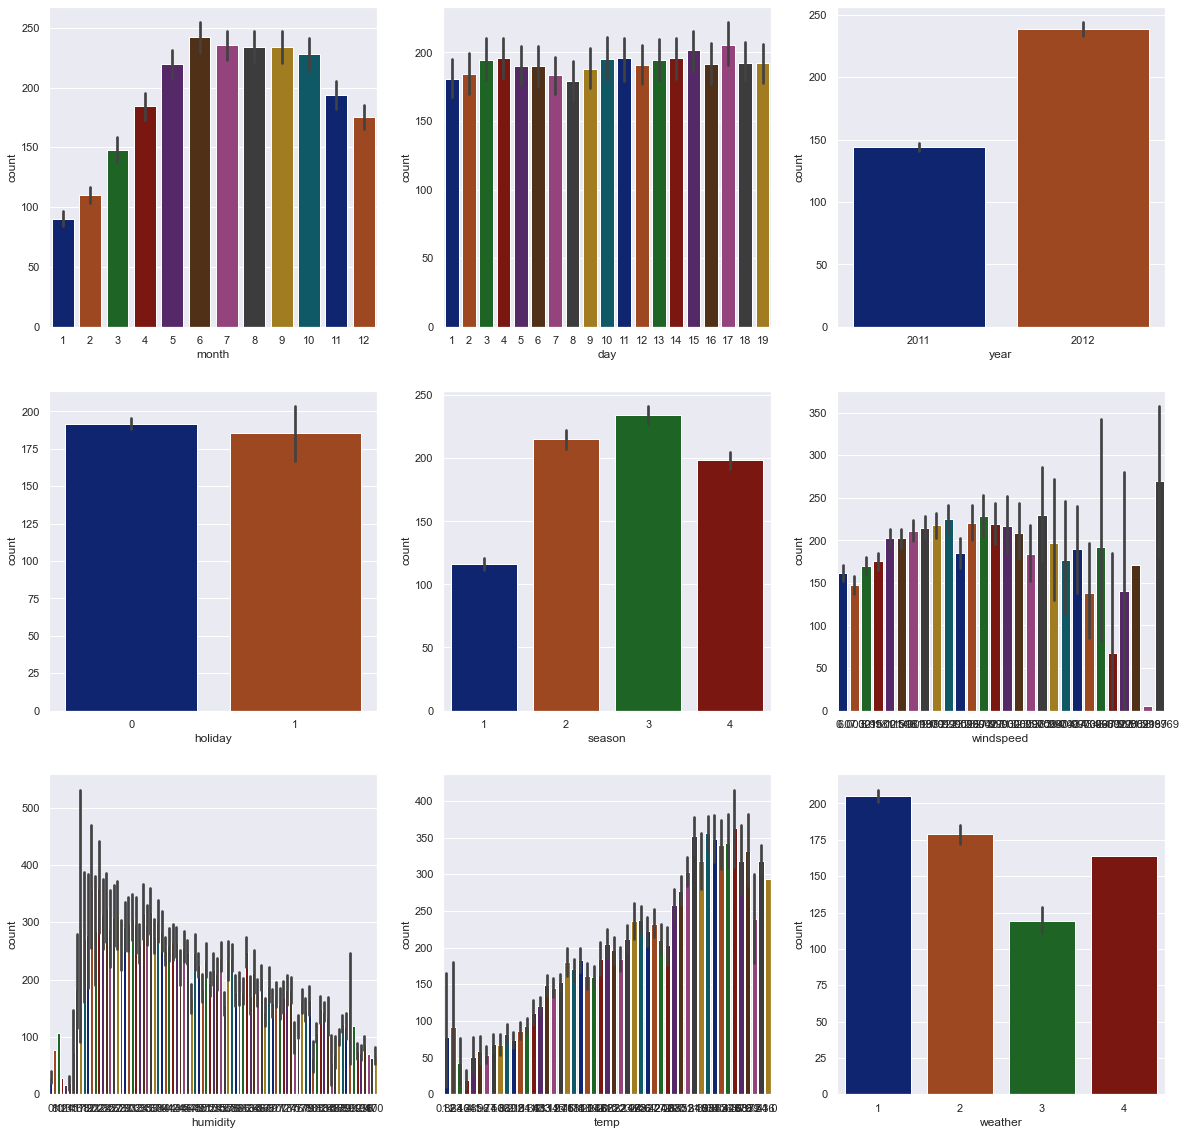

In [28]:
#Plots to show the relationship between count and other variables.
mpl.rc('font', size=11)
fig, axes = plt.subplots(nrows=3, ncols = 3 )
fig.set_size_inches(20,20)

sns.barplot(x='month', y='count', data=df, palette = 'dark', ax = axes[0][0])
sns.barplot(x='day', y='count', data=df, palette = 'dark', ax = axes[0][1])
sns.barplot(x='year', y='count', data=df,  palette = 'dark',ax = axes[0][2])
sns.barplot(x='holiday', y='count', data=df, palette = 'dark', ax = axes[1][0])
sns.barplot(x='season', y='count', data=df,palette = 'dark', ax = axes[1][1])
sns.barplot(x='windspeed', y='count', data=df,  palette = 'dark',ax = axes[1][2])
sns.barplot(x='humidity', y='count', data=df,palette = 'dark',  ax = axes[2][0])
sns.barplot(x='temp', y='count', data=df, palette = 'dark', ax = axes[2][1])
sns.barplot(x='weather', y='count', data=df, palette = 'dark', ax = axes[2][2])

<AxesSubplot:xlabel='hour', ylabel='count'>

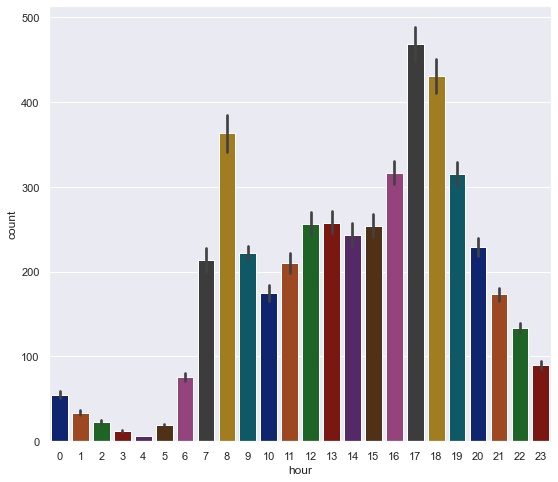

In [29]:
sns.barplot(x='hour', y='count', palette = 'dark', data = df)

<AxesSubplot:>

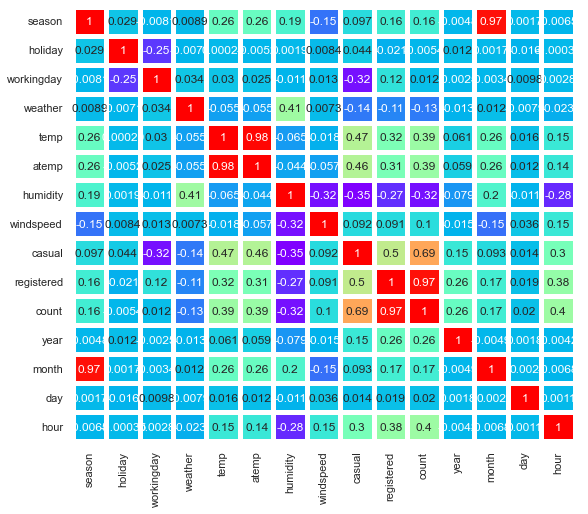

In [30]:
#Correlation between Variables
sns.set (rc = {'figure.figsize':(9, 8)})
sns.heatmap(df.corr(), annot=True, cbar = 0, cmap = 'rainbow', linewidths = 5)

<AxesSubplot:xlabel='hour', ylabel='count'>

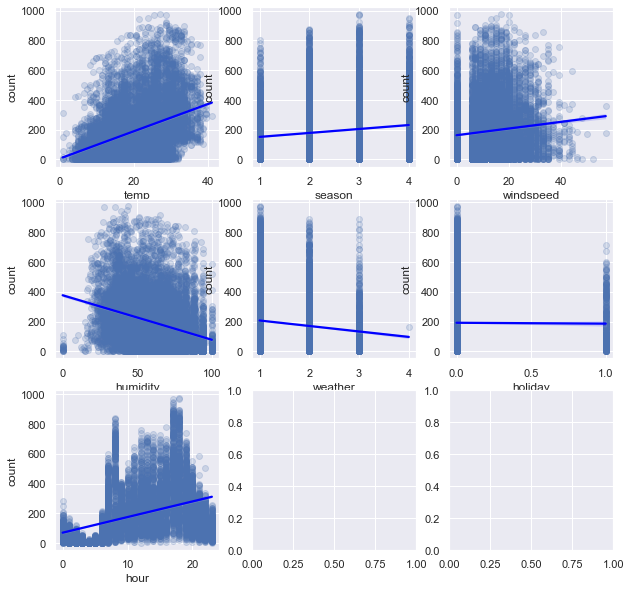

In [31]:
#Correlation of different features to the count Variable
mpl.rc('font', size=11)
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(10,10)

sns.regplot(x='temp', y='count', data=df, scatter_kws={'alpha':0.2},  line_kws={'color':'blue'}, ax=axes[0, 0])
sns.regplot(x='season', y='count', data=df, scatter_kws={'alpha':0.2}, line_kws={'color':'blue'}, ax=axes[0, 1])
sns.regplot(x='windspeed', y='count', data=df, scatter_kws={'alpha':0.2}, line_kws={'color':'blue'}, ax=axes[0,2])
sns.regplot(x='humidity', y='count', data=df, scatter_kws={'alpha':0.2}, line_kws={'color':'blue'}, ax=axes[1,0])
sns.regplot(x='weather', y='count', data=df, scatter_kws={'alpha':0.2},  line_kws={'color':'blue'}, ax=axes[1, 1])
sns.regplot(x='holiday', y='count', data=df, scatter_kws={'alpha':0.2},  line_kws={'color':'blue'}, ax=axes[1, 2])
sns.regplot(x='hour', y='count', data=df, scatter_kws={'alpha':0.2},  line_kws={'color':'blue'}, ax=axes[2, 0])

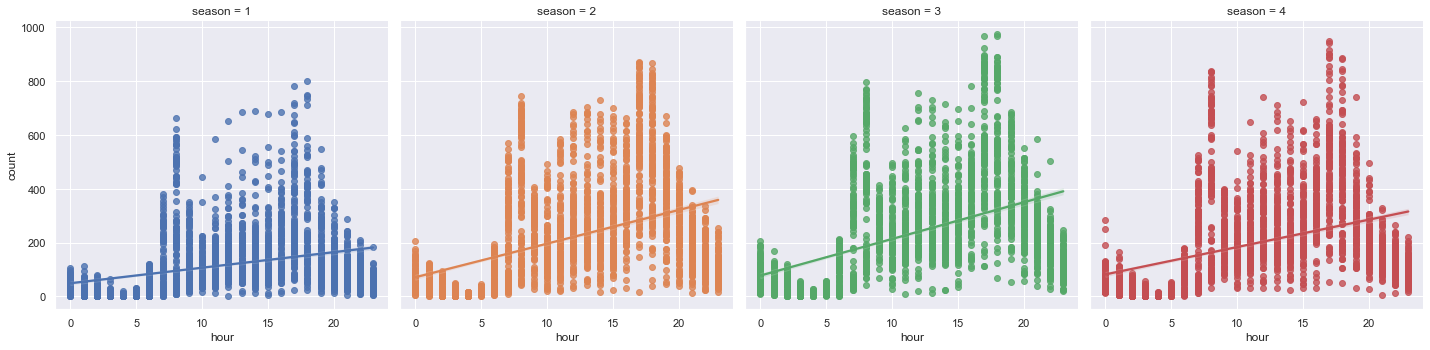

In [32]:
#study how the count changes during the different seasons and hour of the day
sns.lmplot(data = df, 
           x = 'hour', 
           y = 'count', 
           hue = 'season', 
           col = 'season')

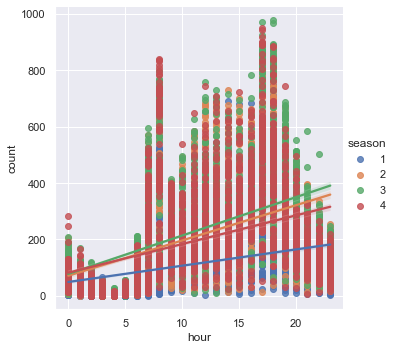

In [33]:
sns.lmplot(data = df, x = 'hour', y = 'count', hue = 'season');

#  Building the Model

#### Linear Regression Model-1 with all the Variables

In [34]:
#Building the Linear Regression Model with all the Variables

X = df[['season','holiday','weather','temp','humidity','windspeed','day','year']]
y = df['count']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)
Xtrain.shape, ytrain.shape
lr = LinearRegression()
lr.fit(Xtrain, ytrain)

print("Coefficients:", lr.coef_)
print("Intercept   :", lr.intercept_)

print("train score :", lr.score(Xtrain, ytrain))
print("test score  :", lr.score(Xtest, ytest))
#Detailed Summary of the Fitted Model


model = sm.OLS(ytrain, sm.add_constant(Xtrain)).fit()
#predictions = model.predict(Xtest) 

print_model = model.summary()
print_model

Coefficients: [ 23.83215844 -14.99830304   3.66648409   7.41765772  -2.8352085
   0.78284758   0.2601132   78.45104939]
Intercept   : -157665.14946492447
train score : 0.30228576654735595
test score  : 0.31749395543235326


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     441.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:10:43   Log-Likelihood:                -52561.
No. Observations:                8164   AIC:                         1.051e+05
Df Residuals:                    8155   BIC:                         1.052e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.577e+05   6779.650    -23.256      0.000   -1.71e+05   -1.44e+05
season        23.8322      1.598     14.912      0.000      20.699      26.965
holiday      -14.9983      9.928     -1.511      0.131     -34.460       4.464
weather        3.6665      2.950      1.243      0.214      -2.116       9.449
temp           7.4177      0.224     33.060      0.000       6.978       7.857
humidity      -2.8352      0.104    -27.221      0.000      -3.039      -2.631
windspeed      0.7828      0.219      3.578      0.000       0.354       1.212
day            0.2601      0.307      0.848      0.397      -0.341       0.862
year          78.4510      3.370     23.277      0.000      71.844      85.058
==============================================================================
Omnibus:                     1199.205   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1947.255
Skew:                           1.002   Prob(JB):                         0.00
Kurtosis:                       4.306   Cond. No.                     8.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Linear Regression Model-2 with selected Variables

In [35]:
#Linear Regression Model2 with selected Variables

X = df[['season','temp','humidity','windspeed', 'year']]
y = df['count']

X.shape, y.shape


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)
Xtrain.shape, ytrain.shape

((8164, 5), (8164,))

In [36]:
#Building the Model

lr = LinearRegression()
lr.fit(Xtrain, ytrain)

print("Coefficients:", lr.coef_)
print("Intercept   :", lr.intercept_)

print("train score :", lr.score(Xtrain, ytrain))
print("test score  :", lr.score(Xtest, ytest))

#Detailed Summary of the Fitted Model

model = sm.OLS(ytrain, sm.add_constant(Xtrain)).fit()

print_model = model.summary()
print_model

Coefficients: [23.64208178  7.42049424 -2.77930025  0.82591917 78.52921253]
Intercept   : -157818.62680303305
train score : 0.3018888497984712
test score  : 0.3172999873786878


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     705.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:10:43   Log-Likelihood:                -52564.
No. Observations:                8164   AIC:                         1.051e+05
Df Residuals:                    8158   BIC:                         1.052e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.578e+05   6777.008    -23.287      0.000   -1.71e+05   -1.45e+05
season        23.6421      1.595     14.825      0.000      20.516      26.768
temp           7.4205      0.224     33.073      0.000       6.981       7.860
humidity      -2.7793      0.094    -29.590      0.000      -2.963      -2.595
windspeed      0.8259      0.216      3.822      0.000       0.402       1.250
year          78.5292      3.369     23.310      0.000      71.925      85.133
==============================================================================
Omnibus:                     1200.976   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1951.959
Skew:                           1.003   Prob(JB):                         0.00
Kurtosis:                       4.309   Cond. No.                     8.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Feature Engineering

In [37]:
#Splitting the train and the test sets

X = df[['season','weather','holiday','hour','temp','humidity','windspeed', 'year']]
y = df['count']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape



((8164, 8), (8164,), (2722, 8), (2722,))

In [38]:
"""
To improve the efficiency of the model, following feature engineering has been applied:

    - Scaling the Temperature
    - Scaling the Humidity
    - Scaling the Windspeed
    - One Hot Encode the Year Column
    - Convert Hour into Polynomial Features
    
"""
my_column_transformer = ColumnTransformer(transformers = [
    ('temp_scaler',    StandardScaler(),            ['temp']),
    ('hum_scaler',    StandardScaler(),            ['humidity']),
    ('wind_scaler',    StandardScaler(),            ['windspeed']),
    ('ohe_year',    OneHotEncoder(drop='first'), ['year']),
    ('poly', PolynomialFeatures(degree=11, include_bias=False), ['hour'])
               ],
   remainder = 'passthrough'
)

Xtrain_fe = my_column_transformer.fit_transform(Xtrain)
Xtrain_fe = pd.DataFrame(Xtrain_fe, columns = my_column_transformer.get_feature_names_out())
Xtrain_fe.shape
Xtest_fe = my_column_transformer.transform(Xtest)
Xtest_fe.shape

(2722, 18)

<AxesSubplot:xlabel='poly__hour^2', ylabel='count'>

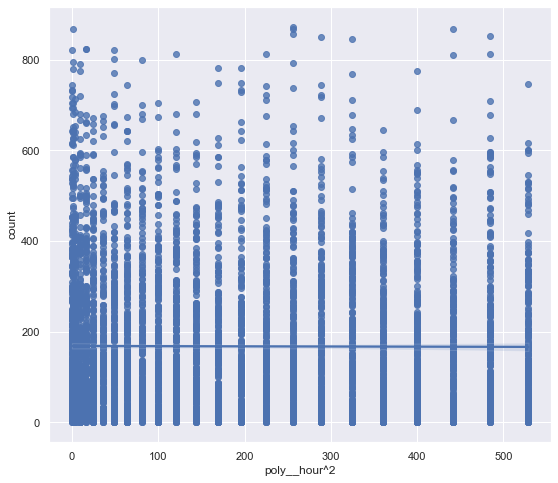

In [39]:
#Barplot
temp = Xtrain_fe.join(ytrain)
sns.regplot(x='poly__hour^2', y='count', data = temp)

In [40]:


Xtrain_fe = Xtrain_fe.rename(columns={'temp_scaler__temp':'temp', 'hum_scaler__humidity':'humidity', 'wind_scaler__windspeed':'windspeed','ohe_year__year_2012':'year', 
       'remainder__season':'season', 'remainder__holiday':'holiday', 'remainder__workingday':'workingday',
       'remainder__weather':'weather',  'remainder__holiday':'holiday',
       })

#Xtest_fe = my_column_transformer.transform(Xtest)
Xtrain_fe.shape, ytrain.shape, Xtest_fe.shape, ytest.shape

((8164, 18), (8164,), (2722, 18), (2722,))

## LR Model2 with Feature Engineering

In [41]:
import warnings
warnings.filterwarnings('ignore', category = UserWarning)

In [42]:
pr = LinearRegression()
pr.fit(Xtrain_fe, ytrain)
print("Coefficients:", pr.coef_)
print("Intercept   :", pr.intercept_)

print("train score :", pr.score(Xtrain_fe, ytrain))
print("test score  :", pr.score(Xtest_fe, ytest))


Coefficients: [ 4.18449279e+01 -1.20536368e+01 -5.37731303e+00  8.66327545e+01
  5.37032494e+01  1.57714273e+00 -4.86488164e+01  2.59327577e+01
 -6.10239566e+00  8.18835338e-01 -6.85578370e-02  3.66953096e-03
 -1.22475691e-04  2.32486830e-06 -1.91622218e-08  1.99758841e+01
 -2.37108890e+01 -1.50387630e+01]
Intercept   : -11.575979696348526
train score : 0.6326585796810935
test score  : 0.625717665493048


#### Scaling the target Variable

In [43]:
# LR Model 3 with Feature Engineering and Scaling of the target Variable
ytrainlog = np.log1p(ytrain)

pr = LinearRegression()
pr.fit(Xtrain_fe, ytrainlog)
print("Coefficients:", pr.coef_)
print("Intercept   :", pr.intercept_)

ypredlog = pr.predict(Xtest_fe)
ypred = np.exp(ypredlog)-1

print("train score :", pr.score(Xtrain_fe, ytrainlog))
print("test score  :", pr.score(Xtest_fe, ypredlog))

Coefficients: [ 2.69611388e-01 -4.93379222e-02 -4.29637517e-02  4.75086982e-01
  1.91130134e-01 -1.89166715e-01 -4.38480429e-01  2.83663070e-01
 -7.12958395e-02  9.80716359e-03 -8.21051778e-04  4.31290352e-05
 -1.39294804e-06  2.53389515e-08 -1.98999260e-10  1.59150955e-01
 -1.81175848e-01 -5.15510936e-02]
Intercept   : 3.2741011567600875
train score : 0.8092148369644152
test score  : 1.0


#### Poisson Regressor

In [44]:
#Poisson Regression Model: the transformations are handled internally
from sklearn.linear_model import PoissonRegressor

m = PoissonRegressor(alpha=1)
m.fit(Xtrain_fe, ytrain)
m.predict(Xtrain_fe)

array([191.33978442, 191.33978442, 191.33978442, ..., 191.33978442,
       191.33978442, 191.33978442])

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = pr.predict(Xtest_fe)

# The mean squared error 
mse_pr = np.sqrt(mean_squared_error(ytest, y_pred))
print('Mean squared error: %.2f' % mse_pr)

# The mean absolute error 
print('Mean absolute error: %.2f' % mean_absolute_error(ytest, y_pred))
# The coefficient of determination: 1 is perfect prediction f
print('R-squared (Coefficient of determination): %.2f' % r2_score(ytest, y_pred))


#It is very sensitive to outliers as each residual is squared. In RMSE, you calculate the square root of the full above expression.
#This means the values are less sensitive to outliers than the MSE.

Mean squared error: 260.21
Mean absolute error: 187.70
R-squared (Coefficient of determination): -1.06
